In [1]:
# 1. Import thư viện cần thiết
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, GRU

Mounted at /content/drive


In [2]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('/content/ETH-USD.csv')
df1=df.reset_index()['Close']

In [3]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [4]:
# 4. Chia train test
train_size = int(0.7 * len(df1))
test_size = len(df1) - train_size
train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

In [5]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [6]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [7]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [15]:
# 8. Define GRU Model
model = Sequential()
model.add(GRU(60, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [16]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
19/19 [==============================] - 4s 56ms/step - loss: 0.0616
Epoch 2/100
19/19 [==============================] - 1s 53ms/step - loss: 0.0098
Epoch 3/100
19/19 [==============================] - 1s 57ms/step - loss: 0.0016
Epoch 4/100
19/19 [==============================] - 1s 53ms/step - loss: 0.0010
Epoch 5/100
19/19 [==============================] - 1s 52ms/step - loss: 9.2023e-04
Epoch 6/100
19/19 [==============================] - 1s 68ms/step - loss: 8.8768e-04
Epoch 7/100
19/19 [==============================] - 1s 54ms/step - loss: 8.4842e-04
Epoch 8/100
19/19 [==============================] - 1s 55ms/step - loss: 8.2149e-04
Epoch 9/100
19/19 [==============================] - 2s 84ms/step - loss: 7.9528e-04
Epoch 10/100
19/19 [==============================] - 2s 85ms/step - loss: 7.8473e-04
Epoch 11/100
19/19 [==============================] - 2s 84ms/step - loss: 7.7351e-04
Epoch 12/100
19/19 [==============================] - 1s 70ms/step - loss: 7.43

In [17]:
# 10. Dự đoán trên tập train và test
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

14/14 [==============================] - 0s 13ms/step


In [18]:
# 11. Chuẩn hóa dữ liệu
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)

In [19]:
# 12. Đánh giá độ chính xác thuật toán
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
test_mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
test_mse = np.mean((np.array(ytest) - np.array(y_pred))**2)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MSE:', test_mse)

Testing RMSE: 1878.466350620772
Testing MAPE: 514321.9452409919
Testing MSE: 3528635.830414521


In [21]:
# 13. Dự báo 30 ngày tiếp theo
x_input=test_data[-101:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


0 day input [0.41510422 0.41913304 0.41982664 0.41533296 0.40770371 0.41236624
 0.40823798 0.41305071 0.42040663 0.43711715 0.44307008 0.45360381
 0.4643719  0.4511462  0.47792886 0.47817396 0.47443969 0.47684049
 0.44963975 0.44484535 0.45731176 0.4692081  0.4485249  0.4501391
 0.44366341 0.4480859  0.43970537 0.4448184  0.4528225  0.47132356
 0.4676059  0.4583845  0.45984566 0.4511045  0.48242966 0.47579902
 0.46582865 0.46399407 0.46174069 0.47681183 0.47755809 0.44670091
 0.45909618 0.45901304 0.4532654  0.44927542 0.47270777 0.47521643
 0.52568486 0.53366439 0.51342419 0.52451382 0.50231726 0.51063859
 0.52687334 0.51425567 0.50120646 0.50598788 0.50175317 0.49841889
 0.46798451 0.45306573 0.45155041 0.4481788  0.45870516 0.45885113
 0.45658009 0.46931128 0.4751455  0.46196897 0.46649526 0.46739144
 0.4648391  0.46345822 0.46544542 0.48103901 0.4920022  0.49118573
 0.50556612 0.50848278 0.50983178 0.54185262 0.53846419 0.56733105
 0.57721657 0.57281636 0.56919648 0.588834   0.6025

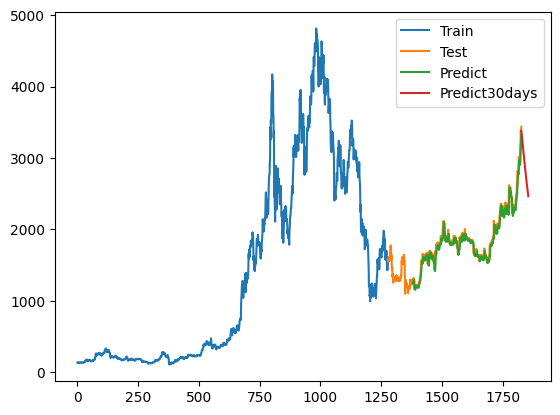

In [22]:
# 14.Vẽ hình

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Predict30days'])
plt.show()

In [23]:
x_input.shape

(1, 100, 1)

In [24]:
train_size_82 = int(0.8 * len(df1))
test_size_82 = len(df1) - train_size_82
train_data_82 = df1[:train_size_82]
test_data_82 = df1[train_size_82:train_size_82+test_size_82]

In [25]:
X_train_82, y_train_82 = create_dataset(train_data_82, time_step)
X_test_82, ytest_82 = create_dataset(test_data_82, time_step)

In [26]:
X_train_82 =X_train_82.reshape(X_train_82.shape[0],X_train_82.shape[1] , 1)
X_test_82 = X_test_82.reshape(X_test_82.shape[0],X_test_82.shape[1] , 1)

In [27]:
model.fit(X_train_82,y_train_82,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
22/22 [==============================] - 2s 84ms/step - loss: 4.1485e-04
Epoch 2/100
22/22 [==============================] - 2s 80ms/step - loss: 3.9792e-04
Epoch 3/100
22/22 [==============================] - 1s 53ms/step - loss: 4.2317e-04
Epoch 4/100
22/22 [==============================] - 1s 52ms/step - loss: 4.0066e-04
Epoch 5/100
22/22 [==============================] - 1s 52ms/step - loss: 3.9291e-04
Epoch 6/100
22/22 [==============================] - 1s 49ms/step - loss: 4.0650e-04
Epoch 7/100
22/22 [==============================] - 1s 51ms/step - loss: 3.9894e-04
Epoch 8/100
22/22 [==============================] - 1s 51ms/step - loss: 4.0121e-04
Epoch 9/100
22/22 [==============================] - 1s 53ms/step - loss: 3.9402e-04
Epoch 10/100
22/22 [==============================] - 1s 52ms/step - loss: 3.9834e-04
Epoch 11/100
22/22 [==============================] - 1s 66ms/step - loss: 4.1724e-04
Epoch 12/100
22/22 [==============================] - 2s 87ms/s

In [28]:
train_predict_82=model.predict(X_train_82)
y_pred_82=model.predict(X_test_82)

9/9 [==============================] - 0s 12ms/step


In [29]:
train_predict_82=scaler.inverse_transform(train_predict_82)
y_pred_82=scaler.inverse_transform(y_pred_82)

In [30]:
test_82_rmse = np.sqrt(np.mean((y_pred_82 - ytest_82)**2))
test_82_mape = np.mean(np.abs((ytest_82 - y_pred_82) / ytest_82)) * 100
test_82_mse = np.mean((np.array(ytest_82) - np.array(y_pred_82))**2)
print('Testing RMSE:', test_82_rmse)
print('Testing MAPE:', test_82_mape)
print('Testing MSE:', test_82_mse)

Testing RMSE: 2036.800607135993
Testing MAPE: 511916.80204355327
Testing MSE: 4148556.7132295496


In [31]:
# 13. Dự báo 30 ngày tiếp theo
x_input=test_data_82[-101:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.41510422 0.41913304 0.41982664 0.41533296 0.40770371 0.41236624
 0.40823798 0.41305071 0.42040663 0.43711715 0.44307008 0.45360381
 0.4643719  0.4511462  0.47792886 0.47817396 0.47443969 0.47684049
 0.44963975 0.44484535 0.45731176 0.4692081  0.4485249  0.4501391
 0.44366341 0.4480859  0.43970537 0.4448184  0.4528225  0.47132356
 0.4676059  0.4583845  0.45984566 0.4511045  0.48242966 0.47579902
 0.46582865 0.46399407 0.46174069 0.47681183 0.47755809 0.44670091
 0.45909618 0.45901304 0.4532654  0.44927542 0.47270777 0.47521643
 0.52568486 0.53366439 0.51342419 0.52451382 0.50231726 0.51063859
 0.52687334 0.51425567 0.50120646 0.50598788 0.50175317 0.49841889
 0.46798451 0.45306573 0.45155041 0.4481788  0.45870516 0.45885113
 0.45658009 0.46931128 0.4751455  0.46196897 0.46649526 0.46739144
 0.4648391  0.46345822 0.46544542 0.48103901 0.4920022  0.49118573
 0.50556612 0.50848278 0.50983178 0.54185262 0.53846419 0.56733105
 0.57721657 0.57281636 0.56919648 0.588834   0.6025

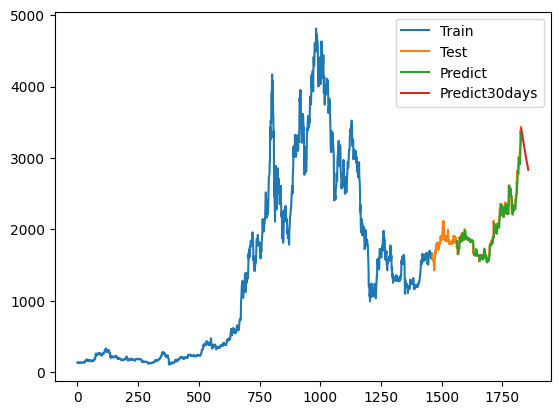

In [32]:
train_data_index = pd.RangeIndex(start=0, stop=train_size_82, step=1)
plt.plot(scaler.inverse_transform(train_data_82))
test_data_index = pd.RangeIndex(start=train_size_82, stop=train_size_82+test_size_82, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data_82))
test_data_index = pd.RangeIndex(start=train_size_82+101, stop=train_size_82+test_size_82, step=1)
plt.plot(test_data_index,(y_pred_82))
prediect_data_index = pd.RangeIndex(start=len(df1), stop=len(df1)+30, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Predict30days'])
plt.show()

In [33]:
train_size_91 = int(0.9 * len(df1))
test_size_91 = len(df1) - train_size_91
train_data_91 = df1[:train_size_91]
test_data_91 = df1[train_size_91:train_size_91+test_size_91]

In [34]:
X_train_91, y_train_91 = create_dataset(train_data_91, time_step)
X_test_91, ytest_91 = create_dataset(test_data_91, time_step)

In [35]:
X_train_91 =X_train_91.reshape(X_train_91.shape[0],X_train_91.shape[1] , 1)
X_test_91 = X_test_91.reshape(X_test_91.shape[0],X_test_91.shape[1] , 1)

In [36]:
model.fit(X_train_91,y_train_91,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
25/25 [==============================] - 2s 67ms/step - loss: 3.4325e-04
Epoch 2/100
25/25 [==============================] - 1s 52ms/step - loss: 3.4321e-04
Epoch 3/100
25/25 [==============================] - 1s 54ms/step - loss: 3.5112e-04
Epoch 4/100
25/25 [==============================] - 1s 51ms/step - loss: 3.4355e-04
Epoch 5/100
25/25 [==============================] - 1s 53ms/step - loss: 3.5220e-04
Epoch 6/100
25/25 [==============================] - 1s 52ms/step - loss: 3.5791e-04
Epoch 7/100
25/25 [==============================] - 1s 52ms/step - loss: 3.4616e-04
Epoch 8/100
25/25 [==============================] - 2s 66ms/step - loss: 3.4879e-04
Epoch 9/100
25/25 [==============================] - 2s 88ms/step - loss: 3.4691e-04
Epoch 10/100
25/25 [==============================] - 2s 87ms/step - loss: 3.7237e-04
Epoch 11/100
25/25 [==============================] - 2s 61ms/step - loss: 3.5150e-04
Epoch 12/100
25/25 [==============================] - 1s 51ms/s

In [37]:
train_predict_91=model.predict(X_train_91)
y_pred_91=model.predict(X_test_91)

3/3 [==============================] - 0s 14ms/step


In [38]:
train_predict_91=scaler.inverse_transform(train_predict_91)
y_pred_91=scaler.inverse_transform(y_pred_91)

In [39]:
test_91_rmse = np.sqrt(np.mean((y_pred_91 - ytest_91)**2))
test_91_mape = np.mean(np.abs((ytest_91 - y_pred_91) / ytest_91)) * 100
test_91_mse = np.mean((np.array(ytest_91) - np.array(y_pred_91))**2)
print('Testing RMSE:', test_91_rmse)
print('Testing MAPE:', test_91_mape)
print('Testing MSE:', test_91_mse)

Testing RMSE: 2471.6951847973223
Testing MAPE: 494639.9015817306
Testing MSE: 6109277.08655027


In [41]:
x_input=test_data_91[-101:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.41510422 0.41913304 0.41982664 0.41533296 0.40770371 0.41236624
 0.40823798 0.41305071 0.42040663 0.43711715 0.44307008 0.45360381
 0.4643719  0.4511462  0.47792886 0.47817396 0.47443969 0.47684049
 0.44963975 0.44484535 0.45731176 0.4692081  0.4485249  0.4501391
 0.44366341 0.4480859  0.43970537 0.4448184  0.4528225  0.47132356
 0.4676059  0.4583845  0.45984566 0.4511045  0.48242966 0.47579902
 0.46582865 0.46399407 0.46174069 0.47681183 0.47755809 0.44670091
 0.45909618 0.45901304 0.4532654  0.44927542 0.47270777 0.47521643
 0.52568486 0.53366439 0.51342419 0.52451382 0.50231726 0.51063859
 0.52687334 0.51425567 0.50120646 0.50598788 0.50175317 0.49841889
 0.46798451 0.45306573 0.45155041 0.4481788  0.45870516 0.45885113
 0.45658009 0.46931128 0.4751455  0.46196897 0.46649526 0.46739144
 0.4648391  0.46345822 0.46544542 0.48103901 0.4920022  0.49118573
 0.50556612 0.50848278 0.50983178 0.54185262 0.53846419 0.56733105
 0.57721657 0.57281636 0.56919648 0.588834   0.6025

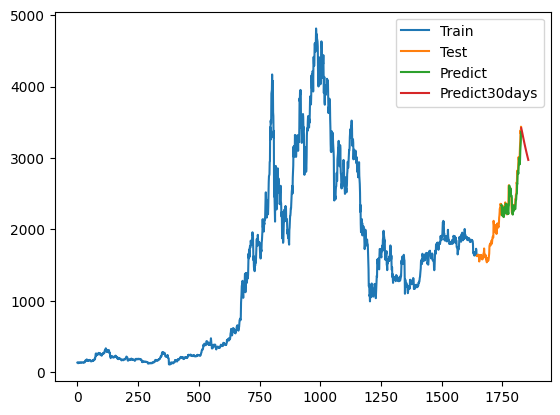

In [42]:
train_data_index = pd.RangeIndex(start=0, stop=train_size_91, step=1)
plt.plot(scaler.inverse_transform(train_data_91))
test_data_index = pd.RangeIndex(start=train_size_91, stop=train_size_91+test_size_91, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data_91))
test_data_index = pd.RangeIndex(start=train_size_91+101, stop=train_size_91+test_size_91, step=1)
plt.plot(test_data_index,(y_pred_91))
predict_data_index = pd.RangeIndex(start=len(df1), stop=len(df1)+30, step=1)
plt.plot(predict_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Predict30days'])
plt.show()